In [1]:
import IPython.display as ipd
import spb
from IPython.display import Math, display
from sympy import (
    Eq,
    Matrix,
    Rational,
    S,
    Symbol,
    acos,
    asinh,
    atan2,
    cos,
    diff,
    init_printing,
    integrate,
    latex,
    log,
    simplify,
    sin,
    solve,
    sqrt,
    symbols,
)

init_printing()

In [2]:
def print_aligned_latex_equations(*args: str) -> None:
    """
    Print a series of LaTeX equations aligned at the &= sign.

    This function takes a variable number of LaTeX equation strings as input,
    and displays them in a single output cell, aligned at the &= sign.

    Args:
        *args (str): LaTeX equation strings to be aligned and displayed.

    Returns:
        None

    Examples:
        print_aligned_latex_equations(
            r"x &= 2 + 3",
            r"y &= 4 - 5",
            r"z &= 6 * 7"
        )

    """

    result = r"\\".join(
        [
            r"\begin{equation}",
            r"\begin{split}",
            *args,
            r"\nonumber" r"\end{split}",
            r"\end{equation}",
        ]
    )

    ipd.display(ipd.Math(rf"{result}"))  # type: ignore

# Tensor Polar examples 

## Coordinate Transform

\begin{align*} 
    Z^{1^\prime} &= x \\
    Z^{1^\prime} = Z^{1^\prime}(Z) &\rightarrow x = x(r,\theta) \\
    x(r,\theta) &= r \cos \theta \\ \\

    Z^{2^\prime} &= y \\
    Z^{2^\prime} = Z^{2^\prime}(Z) &\rightarrow y = y(r,\theta) \\
    y(r,\theta) &= r \sin \theta \\ \\    
\end{align*}



$
s = \displaystyle \int_{\theta_1}^{\theta_2} 
        \sqrt{ 
            r(\theta)^2 + \left( \frac{dr}{d\theta} \right)^2 
        } 
    \, d\theta
$



## Polar arc length

To determine the arc length of a curve given in polar coordinates, we 
use a specific formula. Let's say a curve is given by a polar equation:

$$
r = f(\theta)
$$

where $ r $ is the radius as a function of the polar angle $ \theta $.

### Arc Length Formula for Polar Coordinates

The formula for the arc length $ L $ of a curve in polar coordinates between 
angles $ \theta = \alpha $ and $ \theta = \beta $ is:

$$
s = \int_{\alpha}^{\beta} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} \, d\theta
$$



## Polar equation examples 

### 1. **Line Through the Origin**

##### _Polar Form_:  A line through the origin in polar coordinates is given by:
$$
\theta = \theta_0
$$
Here, $ \theta_0 $ is the constant angle of the line relative to the positive $ x $-axis.

##### _Cartesian Form_: Using the relationships $ x = r \cos(\theta) $ and $ y = r \sin(\theta) $, we can convert this to Cartesian coordinates. For a line passing through the origin with a slope $ m = \tan(\theta_0) $, the equation of the line in Cartesian form is:

$$
y = x \tan(\theta_0)
$$

### 2. **Lemniscate (Infinity Symbol)**

##### _Polar Form_:  The equation of a lemniscate (figure-eight or infinity symbol) in polar coordinates is:
$$
r^2 = a^2 \cos(2\theta)
$$
where $ a $ is a constant that controls the size of the lemniscate.

##### _Cartesian Form_: To convert this to Cartesian form, use the identities $ r^2 = x^2 + y^2 $, $ \cos(2\theta) = \frac{x^2 - y^2}{x^2 + y^2} $. Substituting these into the polar equation, we get the _Cartesian form_: 

$$
(x^2 + y^2)^2 = a^2 (x^2 - y^2)
$$
This is the equation of the lemniscate in Cartesian coordinates.

### 3. **Cardioid**

##### _Polar Form_:  A cardioid is a heart-shaped curve, and its equation in polar coordinates is:
$$
r = a(1 + \cos(\theta))
$$
where $ a $ controls the size of the cardioid.

##### _Cartesian Form_: 
Using the polar-to-Cartesian relationships, $ r = \sqrt{x^2 + y^2} $ and $ \cos(\theta) = \frac{x}{\sqrt{x^2 + y^2}} $, we substitute into the polar equation to get:
$$
\sqrt{x^2 + y^2} = a \left( 1 + \frac{x}{\sqrt{x^2 + y^2}} \right)
$$
Squaring both sides and simplifying, the Cartesian form is a bit more complex but can be written as:
$$
(x^2 + y^2 - ax)^2 = a^2(x^2 + y^2)
$$

### 4. **Spiral of Archimedes**

##### _Polar Form_:  The equation of the **Spiral of Archimedes** is:
$$
r = a\theta
$$
where $ a $ is a constant and $ \theta $ is the angle.

##### _Cartesian Form_: Using $ r = \sqrt{x^2 + y^2} $, $ \theta = \tan^{-1}(y/x) $, we substitute into the polar equation to get the Cartesian form, though it’s typically expressed parametrically:
$$
x = r \cos(\theta) = a\theta \cos(\theta)
$$
$$
y = r \sin(\theta) = a\theta \sin(\theta)
$$
This describes the spiral as $ \theta $ increases, tracing out the curve.

### Conclusion:
- **Line through origin**: $ \theta = \theta_0 $ → $ y = x \tan(\theta_0) $
- **Lemniscate**: $ r^2 = a^2 \cos(2\theta) $ → $ (x^2 + y^2)^2 = a^2 (x^2 - y^2) $
- **Cardioid**: $ r = a(1 + \cos(\theta)) $ → Complex Cartesian form
- **Spiral of Archimedes**: $ r = a\theta $ → Parametric Cartesian form

These examples show that many familiar curves, like spirals, lemniscates, and cardioids, can be represented both in polar and Cartesian coordinates.

# Spiral

\begin{align*} 
    r &= a \theta^2 \\
    s &= \frac{(\theta^2+4)^{\frac{3}{2}}}{3}
\end{align*}

The above Spiral is chosen  since there is a simple algebraic solution to 
find its arc length. Most Polar equations have an  arc length that is 
determined by numerical solutions.

In [3]:
alpha, theta = symbols("alpha, theta", positive=True, real=True)
s, a, b, c = symbols("s, a, b, c", real=True, positive=True)
a = 1
r_theta = a * theta**2

latex_text = [
    rf"r &= {latex(r_theta)}",
]

# Step 1: Compute the arc length differential (ds/dtheta)
dr_dtheta = diff(r_theta, theta)
ds_dtheta = sqrt(r_theta**2 + dr_dtheta**2)

latex_text += [
    r"\frac{d r}{d \theta} &= " rf"{latex(dr_dtheta)}",
]
latex_text += [
    r"\frac{d s}{d \theta} &= " rf"{latex(ds_dtheta)}",
]

# Step 2: Integrate ds to get arc length as a function of theta
s_theta = integrate(ds_dtheta, theta).simplify()
latex_text += [
    r"s(\theta) &= " rf"{latex(s_theta)}",
]

theta_s = solve(Eq(s_theta, s), theta, dict=True)[0][theta]
latex_text += [
    r"\theta(s) &= " rf"{latex(theta_s)}",
]

r_s = r_theta.subs(theta, theta_s).simplify()
latex_text += [
    r"r(s) &= " rf"{latex(r_s)}",
]

print_aligned_latex_equations(*latex_text)

<IPython.core.display.Math object>

In [4]:
# Define the polar equations
r_d = 3 ** Rational(2, 3) * s ** Rational(2, 3) - 4
theta_d = sqrt(3 ** Rational(2, 3) * s ** Rational(2, 3) - 4)

# Convert polar to Cartesian coordinates for plotting
x = r_d * cos(theta_d)
y = r_d * sin(theta_d)

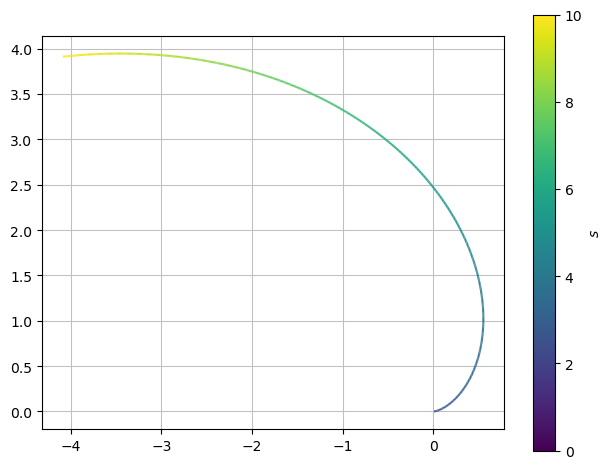

In [5]:
spb.graphics(
    spb.line_parametric_2d(x, y, (s, 0, 10)),
    aspect="equal",
    # backend=spb.KB
)

In [6]:
vec_R = Matrix(3, 1, [r_s * cos(theta_s), r_s * sin(theta_s), 0])
vec_dRds = vec_R.diff(s)

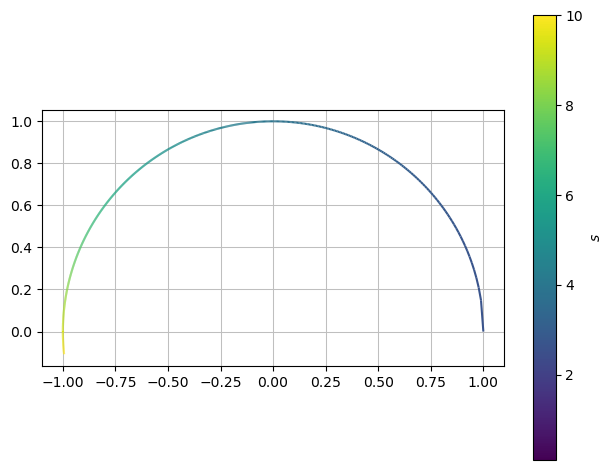

In [7]:
spb.graphics(
    spb.line_parametric_2d(vec_dRds[0], vec_dRds[1], (s, 0.1, 10)), aspect="equal"
)

In [8]:
Matrix(3, 1, [x, y, 0]).diff(s).applyfunc(simplify)

⎡     ⎛     _______________    ⎛   _______________⎞        ⎛   _______________ ↪
⎢ 2/3 ⎜    ╱  2/3  2/3         ⎜  ╱  2/3  2/3     ⎟        ⎜  ╱  2/3  2/3      ↪
⎢3   ⋅⎝- ╲╱  3   ⋅s    - 4 ⋅sin⎝╲╱  3   ⋅s    - 4 ⎠ + 2⋅cos⎝╲╱  3   ⋅s    - 4  ↪
⎢───────────────────────────────────────────────────────────────────────────── ↪
⎢                                      3 ___                                   ↪
⎢                                    3⋅╲╱ s                                    ↪
⎢                                                                              ↪
⎢      ⎛   _______________    ⎛   _______________⎞        ⎛   _______________⎞ ↪
⎢  2/3 ⎜  ╱  2/3  2/3         ⎜  ╱  2/3  2/3     ⎟        ⎜  ╱  2/3  2/3     ⎟ ↪
⎢ 3   ⋅⎝╲╱  3   ⋅s    - 4 ⋅cos⎝╲╱  3   ⋅s    - 4 ⎠ + 2⋅sin⎝╲╱  3   ⋅s    - 4 ⎠ ↪
⎢ ──────────────────────────────────────────────────────────────────────────── ↪
⎢                                      3 ___                                   ↪
⎢                           